### for reading spss files with pandas, we need the pyreadstat installed at first

In [1]:
# ! pip install pyreadstat

### import packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.decomposition import PCA

## Data Preparation
### path of the spss files
This is a survey about different aspects of freedom, which at the time of the survey was really relevant in Hungary. It covers a broad spectre from religion to freedom of press

In [3]:
# the reulsts are store in an SPSS file
path_pc = 'c:\\datasets\\SPSS\\tbd.konyv_szabvagy.sav'
# scale: 1: Not important at all, 7: Very Important

In [4]:
szabvagy = pd.read_spss(path_pc)

In [5]:
szabvagy.head()

,NEME,SZULEV,ISK,VALLAS,VELEMENY,ORVOSVAL,SAJTO,PARTALAK,SZERVALA,TULAJDON,UTAZAS,ELETFORM,VALLALK,POLITIKA
0,nõ,16.0,"szakközépiskola, gimnázium",nagyon fontos,4,4,2,nagyon fontos,nagyon fontos,2,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos
1,nõ,49.0,"fõiskola, egyetem",nagyon fontos,nagyon fontos,6,nagyon fontos,6,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos
2,férfi,26.0,8 általános,3,nagyon fontos,nagyon fontos,nagyon fontos,5,6,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos
3,férfi,48.0,"fõiskola, egyetem",nagyon fontos,nagyon fontos,5,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos,nagyon fontos,5,nagyon fontos,nagyon fontos
4,nõ,10.0,8 általános,nagyon fontos,4,nagyon fontos,nem fontos,nem fontos,nem fontos,nem fontos,nem fontos,4,nem fontos,nem fontos


In [6]:
szabvagy.columns

Index(['NEME', 'SZULEV', 'ISK', 'VALLAS', 'VELEMENY', 'ORVOSVAL', 'SAJTO',
       'PARTALAK', 'SZERVALA', 'TULAJDON', 'UTAZAS', 'ELETFORM', 'VALLALK',
       'POLITIKA'],
      dtype='object')

In [7]:
print(szabvagy.NEME.unique(),
      "\n",szabvagy.SZULEV.unique(),
      "\n",szabvagy.ISK.unique(),
      "\n",szabvagy.VALLAS.unique(),
      "\n",szabvagy.VELEMENY.unique(),
      "\n",szabvagy.ORVOSVAL.unique(),
      "\n",szabvagy.SAJTO.unique(),
      "\n",szabvagy.PARTALAK.unique(),
      "\n",szabvagy.SZERVALA.unique(),
      "\n",szabvagy.TULAJDON.unique(),
      "\n",szabvagy.UTAZAS.unique(),
      "\n",szabvagy.ELETFORM.unique(),
      "\n",szabvagy.VALLALK.unique(),
      "\n",szabvagy.POLITIKA.unique()
      )

[nõ, férfi]
Categories (2, object): [nõ, férfi] 
 [16. 49. 26. 48. 10. 53. 34. 20. 21. 56. 33. 46. 44. 45. 25. 52. 42. 31.
 43. 22. 54. 39. 60. 62. 50. 24. 14. 47. 37. 61. 69. 59. 28. 68. 63. 66.
 41. 70. 38. 11. 36. 32. 23. 30. 65. 67. 19. 15. 64. 71. 57.  9. 35. 51.
 27. 29. 40. 55.  5. 75. 74. 58.  6. 18. 13. 72. 17.  1.  7. 12. 73.] 
 [szakközépiskola, gimnázium, fõiskola, egyetem, 8 általános, szakmunkásképzõ, kevesebb mint 8 általános, nem járt]
Categories (6, object): [szakközépiskola, gimnázium, fõiskola, egyetem, 8 általános, szakmunkásképzõ, kevesebb mint 8 általános, nem járt] 
 [nagyon fontos, 3, 5, 6, 4, nem fontos, NaN, 2]
Categories (7, object): [nagyon fontos, 3, 5, 6, 4, nem fontos, 2] 
 [4, nagyon fontos, 6, 5, 3, nem fontos, 2, NaN]
Categories (7, object): [4, nagyon fontos, 6, 5, 3, nem fontos, 2] 
 [4, 6, nagyon fontos, 5, 2, nem fontos, NaN, 3]
Categories (7, object): [4, 6, nagyon fontos, 5, 2, nem fontos, 3] 
 [2, nagyon fontos, nem fontos, 4, 5, 6, NaN, 3]
Cate

### replace the character answers with numerical values

In [8]:
var_pc = ['VALLAS', 'VELEMENY', 'ORVOSVAL', 'SAJTO','PARTALAK',
          'SZERVALA', 'TULAJDON', 'UTAZAS', 'ELETFORM', 'VALLALK','POLITIKA']
# replace the 'nagyon fontos' with 7 and 'nem fontos' with 1
szabvagy[var_pc] = szabvagy[var_pc].replace(['nagyon fontos','nem fontos'], [7,1])

In [9]:
szabvagy

,NEME,SZULEV,ISK,VALLAS,VELEMENY,ORVOSVAL,SAJTO,PARTALAK,SZERVALA,TULAJDON,UTAZAS,ELETFORM,VALLALK,POLITIKA
0,nõ,16.0,"szakközépiskola, gimnázium",7.0,4.0,4.0,2.0,7.0,7.0,2.0,7.0,7.0,7.0,7.0
1,nõ,49.0,"fõiskola, egyetem",7.0,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
2,férfi,26.0,8 általános,3.0,7.0,7.0,7.0,5.0,6.0,7.0,7.0,7.0,7.0,7.0
3,férfi,48.0,"fõiskola, egyetem",7.0,7.0,5.0,7.0,7.0,7.0,7.0,7.0,5.0,7.0,7.0
4,nõ,10.0,8 általános,7.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,férfi,50.0,"fõiskola, egyetem",4.0,6.0,6.0,6.0,5.0,5.0,5.0,6.0,5.0,7.0,6.0
996,férfi,49.0,"szakközépiskola, gimnázium",4.0,5.0,5.0,6.0,4.0,4.0,7.0,7.0,5.0,7.0,7.0
997,férfi,23.0,8 általános,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
998,nõ,48.0,8 általános,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0


### drop missing values

In [10]:
szabvagy = szabvagy.dropna()
szabvagy.shape

(882, 14)

In [11]:
# translate to english
new_col = ['SEX', 'DOB', 'SCHOOL', 'RELIGION', 'OPINION', 'DOCTOR', 'PRESS',
       'PARTY', 'ORG', 'PROPERTY', 'TRAVEL', 'LIFESTYLE', 'ENTERPR',
       'POLITICS']
szabvagy.columns = new_col
szabvagy['SEX'] = szabvagy['SEX'].replace(['nõ','férfi'], ['woman','man'])
szabvagy['SCHOOL'] = szabvagy['SCHOOL'].replace(['szakközépiskola, gimnázium', 'fõiskola, egyetem', '8 általános', 'szakmunkásképzõ', 'kevesebb mint 8 általános', 'nem járt'],
                                                ['secondary school', 'higher education', 'elementary school', 'college', 'less than elementary school', 'no school'])

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
szabvagy.head()

,SEX,DOB,SCHOOL,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS
0,woman,16.0,secondary school,7.0,4.0,4.0,2.0,7.0,7.0,2.0,7.0,7.0,7.0,7.0
1,woman,49.0,higher education,7.0,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
2,man,26.0,elementary school,3.0,7.0,7.0,7.0,5.0,6.0,7.0,7.0,7.0,7.0,7.0
3,man,48.0,higher education,7.0,7.0,5.0,7.0,7.0,7.0,7.0,7.0,5.0,7.0,7.0
4,woman,10.0,elementary school,7.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0


## Principal Component Analysis
### let's try to create a PC which express the attitude toward freedom

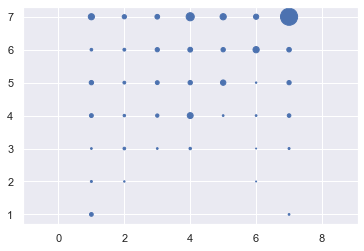

In [13]:
ro = szabvagy.groupby(['RELIGION','OPINION']).size().reset_index()
ro.columns = ['RELIGION','OPINION','Asize']
ro.head()

plt.scatter(ro.RELIGION, ro.OPINION, s = ro.Asize)
plt.axis('equal')
plt.show()

## PCA

#### only one principal component
#### For PCA it is importandt to standardize our data

In [14]:
# keep only the survey answers

szabvagyPCA = szabvagy.iloc[:,3:]

# Get column names first
names = szabvagyPCA.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit the data on the scaler object, and recreate a dataframe
scaled_szabvagyPCA = scaler.fit_transform(szabvagyPCA)
scaled_szabvagyPCA = pd.DataFrame(scaled_szabvagyPCA, columns=names)

scaled_szabvagyPCA.head()

,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS
0,0.976438,-1.466313,-1.534080,-2.116531,1.331839,1.226199,-2.096159,0.650616,0.689977,0.757275,0.828628
1,0.976438,0.689167,-0.058553,0.814971,0.889897,1.226199,0.828251,0.650616,0.689977,0.757275,0.828628
2,-0.915310,0.689167,0.679211,0.814971,0.447955,0.763027,0.828251,0.650616,0.689977,0.757275,0.828628
3,0.976438,0.689167,-0.796316,0.814971,1.331839,1.226199,0.828251,0.650616,-0.579178,0.757275,0.828628
4,0.976438,-1.466313,0.679211,-2.702831,-1.319813,-1.552835,-2.681041,-2.928450,-1.213755,-2.337319,-2.168706


In [15]:
# if we are only interested in 1 PC
pca1 = PCA(n_components=1)
pca1.fit(scaled_szabvagyPCA)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(dict(zip(szabvagyPCA.columns,pca1.components_[0])))

{'RELIGION': -0.15988820447565427, 'OPINION': -0.27834582686864584, 'DOCTOR': -0.21921362694299495, 'PRESS': -0.32158016669793676, 'PARTY': -0.29821594133164153, 'ORG': -0.31641868343597146, 'PROPERTY': -0.3219328747778821, 'TRAVEL': -0.3344191047687605, 'LIFESTYLE': -0.3330613705597689, 'ENTERPR': -0.3323872264857608, 'POLITICS': -0.34575910053760917}


### The components_ are the cofficients of the linear combination of the variables:
### with other words: -0.16*RELIGION+(-0.278)*OPINION +...(-0.346)*POLITICS = PC1

In [17]:
print(pca1.explained_variance_,pca1.explained_variance_ratio_)

[5.30307301] [0.48155095]


As it was standardized, the sum of variance was 11. The first PC explains 5.3 out of it, which is 48%

In [18]:
projected1 = pca1.transform(scaled_szabvagyPCA)
print(scaled_szabvagyPCA.shape)
print(projected1.shape)

(882, 11)
(882, 1)


In [19]:
pc_df = pd.DataFrame(data = projected1,columns = ['principal component 1'])
scaled_szabvagyPCA_idx = scaled_szabvagyPCA.reset_index()
principalDf = pd.concat([scaled_szabvagyPCA_idx,
                         pc_df],
                        axis = 1, sort=False)
principalDf.head()

,index,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS,principal component 1
0,0,0.976438,-1.466313,-1.534080,-2.116531,1.331839,1.226199,-2.096159,0.650616,0.689977,0.757275,0.828628,0.173004
1,1,0.976438,0.689167,-0.058553,0.814971,0.889897,1.226199,0.828251,0.650616,0.689977,0.757275,0.828628,-2.502803
2,2,-0.915310,0.689167,0.679211,0.814971,0.447955,0.763027,0.828251,0.650616,0.689977,0.757275,0.828628,-2.083712
3,3,0.976438,0.689167,-0.796316,0.814971,1.331839,1.226199,0.828251,0.650616,-0.579178,0.757275,0.828628,-2.050163
4,4,0.976438,-1.466313,0.679211,-2.702831,-1.319813,-1.552835,-2.681041,-2.928450,-1.213755,-2.337319,-2.168706,5.630686


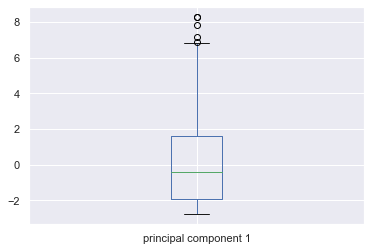

In [20]:
principalDf['principal component 1'].plot(kind='box')
plt.show()

### let's check with matrix multiplication if it's ok

In [21]:
X = np.array(scaled_szabvagyPCA)

In [22]:
X

array([[ 0.97643839, -1.46631349, -1.53407985, ...,  0.68997716,
         0.75727511,  0.82862817],
       [ 0.97643839,  0.68916734, -0.05855267, ...,  0.68997716,
         0.75727511,  0.82862817],
       [-0.91531045,  0.68916734,  0.67921093, ...,  0.68997716,
         0.75727511,  0.82862817],
       ...,
       [-1.86118487, -1.46631349, -1.53407985, ..., -1.21375545,
        -0.79002214, -0.67003905],
       [-1.38824766, -2.1848071 , -3.00960703, ..., -2.48291052,
        -2.33731939, -2.16870626],
       [ 0.03056397, -0.74781988, -0.05855267, ..., -0.57917791,
        -0.27425639, -0.67003905]])

In [23]:
pc = np.array(projected1)

In [24]:
coef = np.array(pca1.components_[0])

In [25]:
coef

array([-0.1598882 , -0.27834583, -0.21921363, -0.32158017, -0.29821594,
       -0.31641868, -0.32193287, -0.3344191 , -0.33306137, -0.33238723,
       -0.3457591 ])

In [26]:
# calculation
pc_calc = X.dot(coef)

In [27]:
for i in range(len(pc_calc)):
    if pc_calc[1]-pc[1][0]>0.0000001:
        print(pc_calc[1],pc[1][0])

#### It seems perfect, the calculated PC are the same (rounding)

## let's compare answers from the 2 ends

### To better see, lets join he PC to the original not standardized answers

In [28]:
pc_df = pd.DataFrame(data = projected1,columns = ['principal component 1'])
szabvagyPCA_idx = szabvagyPCA.reset_index()
principalDf2 = pd.concat([szabvagyPCA_idx,
                         pc_df],
                        axis = 1, sort=False)
principalDf2.tail()

,index,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS,principal component 1
877,995,4.0,6.0,6.0,6.0,5.0,5.0,5.0,6.0,5.0,7.0,6.0,-0.291010
878,996,4.0,5.0,5.0,6.0,4.0,4.0,7.0,7.0,5.0,7.0,7.0,-0.399738
879,997,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.973081
880,998,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,6.585436
881,999,5.0,5.0,6.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,1.376603


### High values: low freedom

In [29]:
principalDf2[principalDf2['principal component 1']>5].sample(5)

,index,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS,principal component 1
505,568,4.0,4.0,4.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,2.0,5.518659
323,369,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.803601
667,741,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.852408
4,4,7.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,5.630686
748,842,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,6.798726


### Low values: high freedom

In [30]:
principalDf2[principalDf2['principal component 1']<-2].sample(5)

,index,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS,principal component 1
857,971,7.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,-2.020739
7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,-2.796325
14,14,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,-2.796325
463,521,7.0,7.0,7.0,7.0,1.0,7.0,7.0,7.0,7.0,7.0,7.0,-2.005561
40,42,7.0,7.0,4.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,-2.311142


### How the coverage increases with including more PCs?

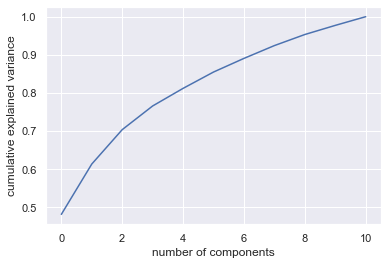

In [31]:
pca_all = PCA().fit(scaled_szabvagyPCA)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### correlations between the PC and the variables

In [32]:
pc_stat = pd.DataFrame(list(zip(list(scaled_szabvagyPCA.columns),pca1.components_[0])),
                       columns = ['Values','Components'])
#pc_stat

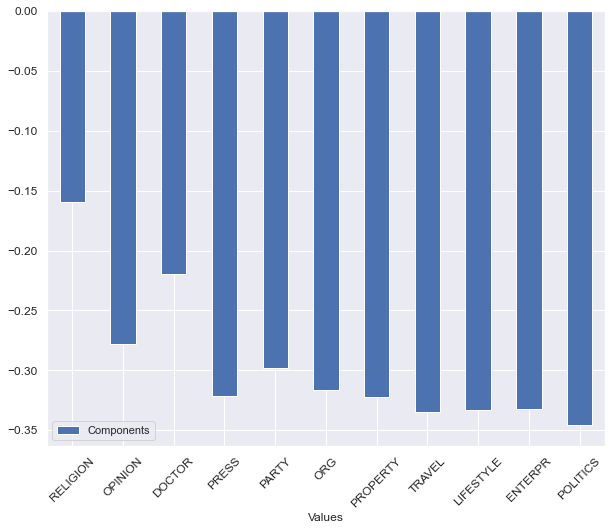

In [33]:
ax = pc_stat.plot.bar(x='Values', y='Components', rot=45, figsize=(10,8),fontsize=12)

### Scree Plot and Eigenvalues

In [34]:
pca = PCA(n_components=11)
pca.fit(scaled_szabvagyPCA)
print("EigenValues:",pca.explained_variance_,"\n%of Variance",pca.explained_variance_ratio_)

EigenValues: [5.30307301 1.45367447 0.99314496 0.68436822 0.50825173 0.47168348
 0.39409078 0.36985369 0.31970264 0.2637159  0.25092694] 
%of Variance [0.48155095 0.13200239 0.09018354 0.06214475 0.04615232 0.0428317
 0.03578581 0.03358494 0.02903092 0.02394699 0.02278568]


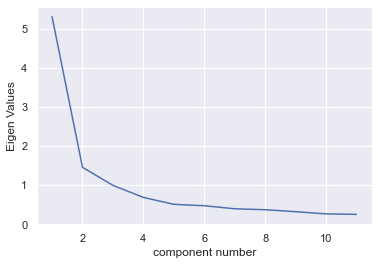

In [35]:
xax = list(range(1,len(pca.explained_variance_)+1))
plt.plot(xax,pca.explained_variance_)
plt.xlabel('component number')
plt.ylabel('Eigen Values')
plt.show()

#### In theory one more PC can be involved as we have 2 PC with >1 eigenvalue

### Let's have more understanding: correlation matrix

In [36]:
principalDf3 = principalDf.drop(['index'],axis =1)
## correlation matrix
corrMatrix = principalDf3.corr()
print (corrMatrix)

                       RELIGION   OPINION    DOCTOR     PRESS     PARTY  \
RELIGION               1.000000  0.410046  0.264070  0.296073  0.337741   
OPINION                0.410046  1.000000  0.451434  0.507720  0.361630   
DOCTOR                 0.264070  0.451434  1.000000  0.459182  0.274277   
PRESS                  0.296073  0.507720  0.459182  1.000000  0.477480   
PARTY                  0.337741  0.361630  0.274277  0.477480  1.000000   
ORG                    0.287871  0.379311  0.255438  0.512111  0.731108   
PROPERTY               0.107346  0.353044  0.270609  0.407403  0.382746   
TRAVEL                 0.097182  0.421429  0.281090  0.465836  0.354460   
LIFESTYLE              0.110255  0.376922  0.300493  0.450500  0.338937   
ENTERPR                0.090520  0.323037  0.228126  0.473449  0.400412   
POLITICS               0.272274  0.442236  0.308846  0.560341  0.561222   
principal component 1 -0.367988 -0.640622 -0.504528 -0.740128 -0.686354   

                        

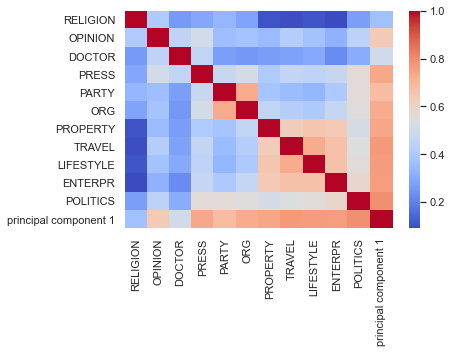

In [37]:
corrMatrix2 = abs(corrMatrix) # using absolute value gives better understanding from visualisation
sns.heatmap(corrMatrix2,
            cmap='coolwarm') # vmin=-1 if we want negative and positive too
plt.show()

RELIGION seems pretty uncorrelated with anything else -including PC, the same seems true for the DOCTOR

### The component_ gives the coefficients to calculate the PC
### In the correlation matrix, the last column is the SPSS's COMPONENT
### COMMUNALITIES are the square of that column

In [39]:
#principalDf3.corrwith(principalDf3,principalDf3['principal component 1'], axis=1)
communalities = (principalDf3[principalDf3.columns[:12]].corr()['principal component 1'][:])**2
print(communalities[:11])

RELIGION     0.135415
OPINION      0.410397
DOCTOR       0.254548
PRESS        0.547789
PARTY        0.471082
ORG          0.530346
PROPERTY     0.548991
TRAVEL       0.592403
LIFESTYLE    0.587602
ENTERPR      0.585226
POLITICS     0.633260
Name: principal component 1, dtype: float64


In [40]:
# it's equal with the first eigenvalue
sum(communalities[:11])

5.297060451257338

## Simple rule: less than 0.25 communalities means no relation (less than 0.5 correlation): get rid of that variables
## Seems like Freedom of Religion is independent from the general freedom

## FACTOR ANALYSIS

In [41]:
from sklearn.decomposition import FactorAnalysis

In [42]:
fa = FactorAnalysis(n_components=2)
szabad_fa2 = fa.fit_transform(scaled_szabvagyPCA)
fa.components_

array([[-0.28278792, -0.54466163, -0.4096349 , -0.66433006, -0.66618045,
        -0.70965284, -0.73244282, -0.77727841, -0.77989527, -0.76842088,
        -0.75950039],
       [ 0.34093995,  0.11671951,  0.09027565,  0.15673961,  0.51945282,
         0.4132249 , -0.21455166, -0.31960104, -0.35252721, -0.22722402,
         0.09908914]])

In [43]:
fa.get_params()

{'copy': True,
 'iterated_power': 3,
 'max_iter': 1000,
 'n_components': 2,
 'noise_variance_init': None,
 'random_state': 0,
 'svd_method': 'randomized',
 'tol': 0.01}

In [44]:
pd.DataFrame(fa.components_.T, columns = ['factor1','factor2'])

,factor1,factor2
0,-0.282788,0.340940
1,-0.544662,0.116720
2,-0.409635,0.090276
3,-0.664330,0.156740
4,-0.666180,0.519453
5,-0.709653,0.413225
6,-0.732443,-0.214552
7,-0.777278,-0.319601
8,-0.779895,-0.352527
9,-0.768421,-0.227224


In [45]:
fa_df = pd.DataFrame(data = szabad_fa2,columns = ['Factor_1', 'Factor_2'])
scaled_szabvagyFA_idx = scaled_szabvagyPCA.reset_index()
FactorDf = pd.concat([scaled_szabvagyFA_idx,
                         fa_df],
                        axis = 1, sort=False)
FactorDf.tail()

,index,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS,Factor_1,Factor_2
877,877,-0.442373,-0.029326,-0.058553,0.228670,0.447955,0.299854,-0.341513,0.054105,-0.579178,0.757275,0.329072,-0.129542,0.406984
878,878,-0.442373,-0.747820,-0.796316,0.228670,0.006013,-0.163318,0.828251,0.650616,-0.579178,0.757275,0.828628,-0.240074,-0.313496
879,879,-1.861185,-1.466313,-1.534080,-0.943930,0.006013,-0.163318,-0.926395,-1.138917,-1.213755,-0.790022,-0.670039,1.062014,0.523766
880,880,-1.388248,-2.184807,-3.009607,-2.116531,-0.877871,-1.089663,-2.096159,-2.331939,-2.482911,-2.337319,-2.168706,2.574562,0.787778
881,881,0.030564,-0.747820,-0.058553,-0.943930,0.006013,-0.163318,-0.341513,-0.542406,-0.579178,-0.274256,-0.670039,0.535886,0.251516


In [46]:
FactorDf3 = FactorDf.drop(['index'],axis =1)
## correlation matrix
corrMatrix = FactorDf3.corr()
print (corrMatrix)

           RELIGION   OPINION    DOCTOR     PRESS     PARTY       ORG  \
RELIGION   1.000000  0.410046  0.264070  0.296073  0.337741  0.287871   
OPINION    0.410046  1.000000  0.451434  0.507720  0.361630  0.379311   
DOCTOR     0.264070  0.451434  1.000000  0.459182  0.274277  0.255438   
PRESS      0.296073  0.507720  0.459182  1.000000  0.477480  0.512111   
PARTY      0.337741  0.361630  0.274277  0.477480  1.000000  0.731108   
ORG        0.287871  0.379311  0.255438  0.512111  0.731108  1.000000   
PROPERTY   0.107346  0.353044  0.270609  0.407403  0.382746  0.457770   
TRAVEL     0.097182  0.421429  0.281090  0.465836  0.354460  0.421388   
LIFESTYLE  0.110255  0.376922  0.300493  0.450500  0.338937  0.406605   
ENTERPR    0.090520  0.323037  0.228126  0.473449  0.400412  0.467384   
POLITICS   0.272274  0.442236  0.308846  0.560341  0.561222  0.550346   
Factor_1  -0.293217 -0.564749 -0.424743 -0.688831 -0.690750 -0.735825   
Factor_2   0.397675  0.136143  0.105298  0.182822  

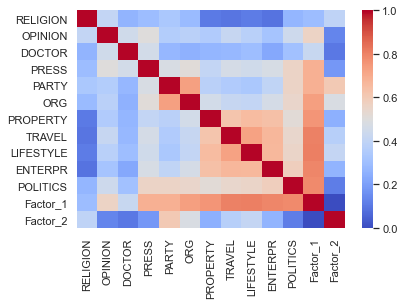

In [47]:
corrMatrix2 = abs(corrMatrix)
sns.heatmap(corrMatrix2,
            cmap='coolwarm') # vmin=-1 if we want negative and positive too
plt.show()

#### From the heatmap it seems, that factor 1 takes it all - similar to the PCA from above:(

In [48]:
#principalDf3.corrwith(principalDf3,principalDf3['principal component 1'], axis=1)
communalities1 = (FactorDf3[FactorDf3.columns[:12]].corr()['Factor_1'][:])**2
communalities2 = (FactorDf3.corr()['Factor_2'][:])**2
factor_stat = pd.DataFrame(list(zip(list(scaled_szabvagyPCA.columns),communalities1[:11],communalities2[:11])),
                       columns = ['Values','communalities1','communalities2'])
factor_stat['communalities'] = factor_stat['communalities1']+factor_stat['communalities2']
print(factor_stat)

       Values  communalities1  communalities2  communalities
0    RELIGION        0.085976        0.158146       0.244122
1     OPINION        0.318942        0.018535       0.337477
2      DOCTOR        0.180406        0.011088       0.191494
3       PRESS        0.474488        0.033424       0.507912
4       PARTY        0.477135        0.367108       0.844243
5         ORG        0.541439        0.232313       0.773753
6    PROPERTY        0.576773        0.062628       0.639401
7      TRAVEL        0.649548        0.138969       0.788516
8   LIFESTYLE        0.653929        0.169078       0.823006
9     ENTERPR        0.634828        0.070244       0.705072
10   POLITICS        0.620174        0.013358       0.633533


##### Rotation will be New in Sklearn version 0.24. - so far it's still unstable

## Let's use a different package for the exploratory Factor Analysis
##### ! pip install factor_analyzer

In [49]:
from factor_analyzer import FactorAnalyzer

### Adequacy Test
Before we perform factor analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

#### Bartlett’s Test
#### Kaiser-Meyer-Olkin Test
**Bartlett’s test of sphericity** checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [50]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_szabvagyPCA)
chi_square_value, p_value

(4889.644618420729, 0.0)

**Kaiser-Meyer-Olkin (KMO) Test** measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [51]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_szabvagyPCA)
kmo_model

0.8965334498413022

### Both tests show that we can start the factor analysis

Choosing the Number of Factors For choosing the number of factors, we can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [52]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation=None)
fa.fit(scaled_szabvagyPCA)
#fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.29706045, 1.45202631, 0.99201894, 0.68359229, 0.50767548,
       0.47114869, 0.39364396, 0.36943436, 0.31934017, 0.2634169 ,
       0.25064245])

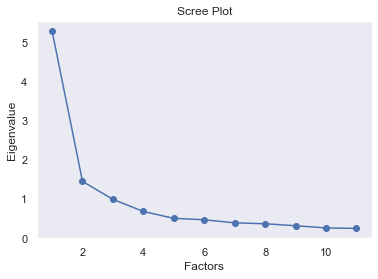

In [53]:
# Create scree plot using matplotlib
plt.scatter(range(1,scaled_szabvagyPCA.shape[1]+1),ev)
plt.plot(range(1,scaled_szabvagyPCA.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### as we've seen before, 2 factors seems ideal

In [54]:
fa = FactorAnalyzer()
fa.set_params(n_factors=2, rotation='varimax')
fa.fit(scaled_szabvagyPCA)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [55]:
loadings = fa.loadings_ # correlations , the base of the communality calculation
pd.DataFrame(data=loadings,index = list(scaled_szabvagyPCA.columns),columns=['Factor1','Factor2'])

,Factor1,Factor2
RELIGION,-0.037717,0.558312
OPINION,0.281924,0.585629
DOCTOR,0.205285,0.454619
PRESS,0.400369,0.616165
PARTY,0.292570,0.662265
ORG,0.381341,0.621370
PROPERTY,0.728235,0.245401
TRAVEL,0.797743,0.229324
LIFESTYLE,0.815140,0.208434
ENTERPR,0.784104,0.234563


#### A bit more meaningful: Religion, Opinion, Doctor, Press, Party and Org are on the second factor
#### Property, Travel, Lifestyle, Enterpreneurship on the first one and Politics on both
#### Something like Public and Personal freedom
#### But still Press and Org are too strong on the first so the factors are not perfect. There should be done some more work on this

In [56]:
# Get variance of each factors
pd.DataFrame(data=fa.get_factor_variance(),index = ['SS Loadings','Proportion Var','Cumulative Var'],
             columns=['Factor1','Factor2'])

,Factor1,Factor2
SS Loadings,3.263640,2.563325
Proportion Var,0.296695,0.233030
Cumulative Var,0.296695,0.529724


In [57]:
fa_tr = fa.transform(scaled_szabvagyPCA)

In [58]:
fa_tr

array([[ 0.24949646, -0.20434665],
       [ 0.61339625,  0.89603736],
       [ 0.81865683,  0.37048628],
       ...,
       [-0.83805221, -0.86429186],
       [-2.23260075, -1.53803442],
       [-0.46636083, -0.35869345]])

In [59]:
fa_df = pd.DataFrame(data = fa_tr,columns = ['Factor1','Factor2'])
scaled_szabvagyPCA_idx = scaled_szabvagyPCA.reset_index()
FaDf = pd.concat([scaled_szabvagyPCA_idx,
                         fa_df],
                        axis = 1, sort=False)
FaDf.head()

,index,RELIGION,OPINION,DOCTOR,PRESS,PARTY,ORG,PROPERTY,TRAVEL,LIFESTYLE,ENTERPR,POLITICS,Factor1,Factor2
0,0,0.976438,-1.466313,-1.534080,-2.116531,1.331839,1.226199,-2.096159,0.650616,0.689977,0.757275,0.828628,0.249496,-0.204347
1,1,0.976438,0.689167,-0.058553,0.814971,0.889897,1.226199,0.828251,0.650616,0.689977,0.757275,0.828628,0.613396,0.896037
2,2,-0.915310,0.689167,0.679211,0.814971,0.447955,0.763027,0.828251,0.650616,0.689977,0.757275,0.828628,0.818657,0.370486
3,3,0.976438,0.689167,-0.796316,0.814971,1.331839,1.226199,0.828251,0.650616,-0.579178,0.757275,0.828628,0.190248,1.083917
4,4,0.976438,-1.466313,0.679211,-2.702831,-1.319813,-1.552835,-2.681041,-2.928450,-1.213755,-2.337319,-2.168706,-2.444791,-0.867880


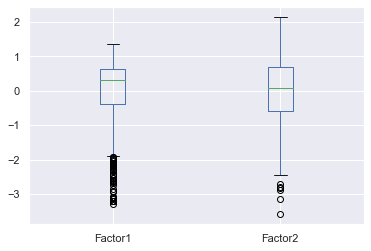

In [60]:
FaDf[['Factor1','Factor2']].plot(kind='box')
plt.show()

In [61]:
FaDf3 = FaDf.drop(['index'],axis =1)
## correlation matrix
corrMatrix = FaDf3.corr()
print (corrMatrix)

           RELIGION   OPINION    DOCTOR     PRESS     PARTY       ORG  \
RELIGION   1.000000  0.410046  0.264070  0.296073  0.337741  0.287871   
OPINION    0.410046  1.000000  0.451434  0.507720  0.361630  0.379311   
DOCTOR     0.264070  0.451434  1.000000  0.459182  0.274277  0.255438   
PRESS      0.296073  0.507720  0.459182  1.000000  0.477480  0.512111   
PARTY      0.337741  0.361630  0.274277  0.477480  1.000000  0.731108   
ORG        0.287871  0.379311  0.255438  0.512111  0.731108  1.000000   
PROPERTY   0.107346  0.353044  0.270609  0.407403  0.382746  0.457770   
TRAVEL     0.097182  0.421429  0.281090  0.465836  0.354460  0.421388   
LIFESTYLE  0.110255  0.376922  0.300493  0.450500  0.338937  0.406605   
ENTERPR    0.090520  0.323037  0.228126  0.473449  0.400412  0.467384   
POLITICS   0.272274  0.442236  0.308846  0.560341  0.561222  0.550346   
Factor1   -0.040905  0.305749  0.222633  0.434202  0.317294  0.413567   
Factor2    0.643581  0.675071  0.524052  0.710271  

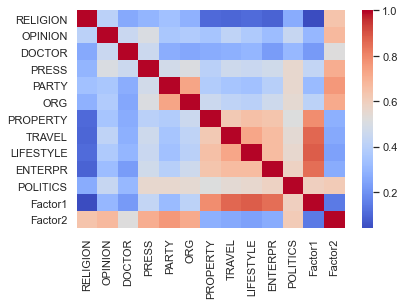

In [62]:
corrMatrix2 = abs(corrMatrix)
sns.heatmap(corrMatrix2,
            cmap='coolwarm') # vmin=-1 if we want negative and positive too
plt.show()

### the correlation matrix shows a relatively nice separate 2 factors

## CONFIRMATORY FACTOR ANALYSIS